<a href="https://colab.research.google.com/github/aprabaswara/Pacmann-Conjoint-Analysis/blob/main/Pacmann_Conjoint_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Pacmann Product Features and Pricing

by [Aditya Prabaswara Mardjikoen](https://github.com/aprabaswara)

1. [Introduction](#intro)

2. [Features Detail](#data)

3. [Exploratory Data Analysis](#eda)

4. [Conjoint Analysis](#ca)

5. [Summary and Recommendation](#summary)

# 1. Introduction <a id='intro'></a>

Finding out what users need is one of many challenging aspects when launching a product. If they do not need your product, they will not buy it. Furthermore, asking them what features they like does not necessarily represent their willingness to buy, e.g. asking which SSD to buy: 128 GB, 256 GB, 512 GB, most likely many will choose 512 GB (because of more storage they get). But, if we give users some hard options to choose, they will think which one has the most benefit to them. So, here comes the conjoint analysis.

Pacmann performs a choice-based conjoint analysis to find out which feature should Pacmann include in their new Product that will increase the buying potential.

# 2. Features Detail <a id='data'></a>

There are several features that Pacmann test for its new product:

1. **Skill List**: Create Analytics Dashboard, Create Machine Learning Model, Deploy Machine Learning Model, Design AB Test Experimentation, Perform Customer Lifetime Analysis, Perform Churn Analytics, Perform Credit Scoring Analytics, Perform Customer Segmentation, Perform Price Optimization, and Designing Data Pipeline

2. **Program Type**: Tutorial based and Mentoring based

3. **Program Price**: IDR 250.000,0, IDR 300.000,0, IDR 350.000,0, IDR 400.000,0, IDR 450.000,0, IDR 500.000,0, and IDR 550.000,0

# 3. Exploratory Data Analysis <a id='eda'></a>

We display the first five rows for the survey dataset and create the summary table for several features that Pacmann test for its new product.

In [1]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# Set up working directory
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/Pacmann Data Scientist Test')

# Create program dataset
data = {
    'SkillList': ['Create Analytics Dashboard','Perform Customer Segmentation',
                  'Design AB Test Experimentation','Create Analytics Dashboard',
                  'Design Data Pipeline','Perform Credit Scoring Analytics',
                  'Perform Customer Segmentation','Perform Customer Segmentation',
                  'Design Data Pipeline','Design AB Test Experimentation',
                  'Perform Price Optimization','Perform Credit Scoring Analytics',
                  'Design Data Pipeline','Perform Customer Lifetime Analytics',
                  'Design AB Test Experimentation','Perform Churn Analytics',
                  'Perform Customer Segmentation','Create Machine Learning Model',
                  'Perform Customer Lifetime Analysis','Design Data Pipeline',
                  'Deploy Machine Learning Model','Perform Credit Scoring Analytics',
                  'Design Data Pipeline','Create Machine Learning Model',
                  'Create Analytics Dashboard','Design AB Test Experimentation',
                  'Perform Customer Lifetime Analysis','Perform Credit Scoring Analytics',
                  'Perform Churn Analytics','Perform Churn Analytics'
                  ],
    'ProgramType': ['Tutorial Based','Mentoring Based','Mentoring Based',
                    'Tutorial Based','Mentoring Based','Mentoring Based',
                    'Mentoring Based','Tutorial Based','Mentoring Based',
                    'Mentoring Based','Tutorial Based','Mentoring Based',
                    'Mentoring Based','Tutorial Based','Tutorial Based',
                    'Tutorial Based','Mentoring Based','Mentoring Based',
                    'Tutorial Based','Mentoring Based','Tutorial Based',
                    'Mentoring Based','Mentoring Based','Tutorial Based',
                    'Mentoring Based','Tutorial Based','Mentoring Based',
                    'Mentoring Based','Mentoring Based','Tutorial Based'
                    ],
    'Price': [500000,350000,300000,500000,300000,550000,350000,450000,250000,
              500000,350000,350000,400000,300000,300000,450000,300000,300000,
              500000,550000,350000,300000,550000,550000,250000,550000,350000,
              400000,450000,500000],
    'ProductCodeOption': ['A','B','C','A','B','C','A','B','C','A','B','C',
                          'A','B','C','A','B','C','A','B','C','A','B','C',
                          'A','B','C','A','B','C'],
    'ProductNumber': ['1','1','1','2','2','2','3','3','3','4','4','4',
                       '5','5','5','6','6','6','7','7','7','8','8','8',
                        '9','9','9','10','10','10']
}

program_df = pd.DataFrame(data)

# Import survey dataset
replace_dict = {'Timestamp': 'Timestamp',
                'Berapa nomer telepon anda? Nomer ini akan digunakan untuk membagikan GoPay Rp 50.000 per orang, hasil undian untuk 100 orang. Kami hanya akan mengirimkan ke pengisi kuisioner yang valid, i.e. jawaban tidak random.': 'PhoneNumber',
                '1. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product1',
                '2. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product2',
                '3. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product3',
                '4. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product4',
                '5. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product5',
                '6. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product6',
                '7. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product7',
                '8. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product8',
                '9. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product9',
                '10. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)': 'Product10'}
survey_df = pd.read_excel("conjoint_survey_organic.xlsx")
survey_df = survey_df.loc[:, ~survey_df.columns.str.contains('^Unnamed')]
survey_df = survey_df.rename(columns=replace_dict)
survey_df.head()

Mounted at /content/drive


,Timestamp,PhoneNumber,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product10
0,2023-03-08 18:47:23,08xx336019xxx,B,A,A,A,A,B,A,C,A,A
1,2023-03-08 18:48:27,08xx10001xxx,C,"C, D. Tidak memilih semua product",C,C,"A, B","A, B",A,A,A,A
2,2023-03-08 20:17:52,08xx56592xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
3,2023-03-13 20:59:49,08xx391631xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
4,2023-03-13 21:01:45,08xx21820xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,C,A,A,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product


The code below display the data types for each features in this dataset.

In [2]:
# Display each features data types in survey dataset
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    56 non-null     datetime64[ns]
 1   PhoneNumber  56 non-null     object        
 2   Product1     56 non-null     object        
 3   Product2     56 non-null     object        
 4   Product3     56 non-null     object        
 5   Product4     56 non-null     object        
 6   Product5     56 non-null     object        
 7   Product6     56 non-null     object        
 8   Product7     56 non-null     object        
 9   Product8     56 non-null     object        
 10  Product9     56 non-null     object        
 11  Product10    56 non-null     object        
dtypes: datetime64[ns](1), object(11)
memory usage: 5.4+ KB


When analyzing the dataset, we notice instances where respondents express preferences for specific products but also opt not to select any particular product. This introduces ambiguity in the data. To address this, we propose excluding responses where users choose not to pick a product while also selecting preferences for other products. This ensures that the dataset focuses on clear product preferences, providing a more straightforward and interpretable analysis.

In [3]:
# DIsplay each survey unique answer
product_list = ['Product1','Product2','Product3','Product4','Product5',
                'Product6','Product7','Product8','Product9','Product10']
for i in product_list:
  print(i+':\n')
  print(survey_df[i].unique().tolist())
  print('\n')

Product1:

['B', 'C', 'D. Tidak memilih semua product', 'A, D. Tidak memilih semua product', 'A', 'A, B', 'C, D. Tidak memilih semua product']


Product2:

['A', 'C, D. Tidak memilih semua product', 'D. Tidak memilih semua product', 'B', 'B, D. Tidak memilih semua product', 'C', 'A, B']


Product3:

['A', 'C', 'A, C', 'B', 'A, B, C', 'D. Tidak memilih semua product', 'A, B', 'A, D. Tidak memilih semua product']


Product4:

['A', 'C', 'D. Tidak memilih semua product', 'A, B', 'A, D. Tidak memilih semua product', 'A, C', 'B']


Product5:

['A', 'A, B', 'C', 'B, C', 'D. Tidak memilih semua product', 'A, D. Tidak memilih semua product', 'A, C', 'B']


Product6:

['B', 'A, B', 'C', 'D. Tidak memilih semua product', 'A', 'C, D. Tidak memilih semua product', 'B, C', 'A, B, C', 'A, C']


Product7:

['A', 'D. Tidak memilih semua product', 'C', 'B', 'A, C', 'A, D. Tidak memilih semua product', 'A, B']


Product8:

['C', 'A', 'D. Tidak memilih semua product', 'B', 'B, D. Tidak memilih semua prod

In [4]:
# Mapping dictionary for replacement
replacement_mapping = {
    'D. Tidak memilih semua product': 'D',
    'A, D. Tidak memilih semua product': 'A',
    'B, D. Tidak memilih semua product': 'B',
    'C, D. Tidak memilih semua product': 'C'
}

# Apply replacement using applymap and replace
survey_df[product_list] = survey_df[product_list].applymap(lambda x: replacement_mapping.get(x, x))

# Display the modified DataFrame
survey_df.head()

,Timestamp,PhoneNumber,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product10
0,2023-03-08 18:47:23,08xx336019xxx,B,A,A,A,A,B,A,C,A,A
1,2023-03-08 18:48:27,08xx10001xxx,C,C,C,C,"A, B","A, B",A,A,A,A
2,2023-03-08 20:17:52,08xx56592xxx,D,D,"A, C",A,A,C,D,D,D,A
3,2023-03-13 20:59:49,08xx391631xxx,D,D,"A, C",A,A,C,D,D,D,A
4,2023-03-13 21:01:45,08xx21820xxx,D,D,C,A,A,D,D,D,D,D


We've organized the survey data to better understand what factors influence people's decisions when choosing a product. Each person's responses were originally spread across different columns, making it challenging to analyze. We transformed the data to have a clear structure, where each row now represents a specific choice a person made. This allows us to easily see which product they preferred. We also combined this with information about the product features and prices. For simplicity, we converted the product numbers into more straightforward choice numbers. The final touch was creating a simple "BuyChoice" column, indicating whether someone decided to buy a product or not. This structured data is now ready for analysis, providing valuable insights into what influences people when making a purchase.

In [5]:
# Melt the DataFrame to reshape it
df_melted = pd.melt(survey_df, id_vars=['Timestamp', 'PhoneNumber'], var_name='ProductNumberOption', value_name='ProductCodeOption')

# Extract ProductNumber and ProductCode
df_melted[['ProductCode', 'ProductNumber']] = df_melted['ProductNumberOption'].str.extract(r'(\D+)(\d+)')

# Split options with commas and create separate rows
df_options_split = df_melted.assign(ProductCodeOption=df_melted['ProductCodeOption'].str.split(',')).explode('ProductCodeOption')

# Drop unnecessary columns
df_options_split = df_options_split[['Timestamp', 'PhoneNumber', 'ProductNumber', 'ProductCodeOption']]

# Merge with skill list program dataset
df_options_split = pd.merge(df_options_split,program_df, how = 'left', on=['ProductNumber', 'ProductCodeOption'],copy='False')

# Replace null value
df_options_split['Price'].fillna(0, inplace=True)
df_options_split['SkillList'].fillna('Not Chosen', inplace=True)
df_options_split['ProgramType'].fillna('Not Chosen', inplace=True)

# Convert product number to integer and rename it to choise number
df_options_split['ProductNumber'] = df_options_split['ProductNumber'].astype(str).astype(int)
df_options_split = df_options_split.rename(columns={'ProductNumber':'ChoiceNumber'})

# Create target variable
df_options_split['BuyChoice'] = (df_options_split['ProductCodeOption'] != 'D').astype(int)

# Display the resulting DataFrame
df_options_split.head()

,Timestamp,PhoneNumber,ChoiceNumber,ProductCodeOption,SkillList,ProgramType,Price,BuyChoice
0,2023-03-08 18:47:23,08xx336019xxx,1,B,Perform Customer Segmentation,Mentoring Based,350000.0,1
1,2023-03-08 18:48:27,08xx10001xxx,1,C,Design AB Test Experimentation,Mentoring Based,300000.0,1
2,2023-03-08 20:17:52,08xx56592xxx,1,D,Not Chosen,Not Chosen,0.0,0
3,2023-03-13 20:59:49,08xx391631xxx,1,D,Not Chosen,Not Chosen,0.0,0
4,2023-03-13 21:01:45,08xx21820xxx,1,D,Not Chosen,Not Chosen,0.0,0


# 4. Conjoint Analysis <a id='ca'></a>

In the survey, about 67.3% of the participants showed interest in purchasing one of the product options, while approximately 32.7% chose not to make a purchase. This indicates a strong inclination from the majority of respondents towards selecting a product, showcasing positive engagement with the choices presented.

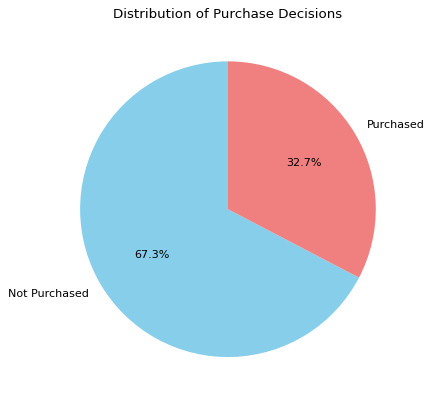

In [6]:
# Assuming df_options_split is your DataFrame
target_distribution = df_options_split['BuyChoice'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(target_distribution, labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Purchase Decisions')
plt.show()

The logistic regression model equation can be expressed as follows:


$P(y=1) = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\dots++\beta_{n}x_{n})}}$


Here:

* P(y=1) is the probability of the positive class (e.g., buying the product),
* $e$ is the base of the natural logarithm,
$\beta_{0}$ is the intercept term,
* $\beta_{1},\beta_{2},…,\beta_{n}$ are the coefficients associated with each feature ($x_{1},x_{2},\dots,x_{n}$),
* ($x_{1},x_{2},\dots,x_{n}$) are the values of the input features.

The logistic function (sigmoid) compresses the output into the range [0, 1], representing the probability of belonging to the positive class. The decision boundary is determined by a threshold (commonly 0.5), where predictions above the threshold are classified as positive, and those below as negative.

We can see that our model predicts well in the test dataset based on the accuracy score.

In [28]:
import numpy as np
from numpy import log, dot, exp, shape
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Logistic regression function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def initialize_parameters(features):
    return np.random.rand(features, 1)

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-15
    cost = -1/m * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

def standardize(X_tr):
    for i in range(X_tr.shape[1]):
        mean_val = np.mean(X_tr.iloc[:, i])
        std_val = np.std(X_tr.iloc[:, i])
        X_tr.iloc[:, i] = (X_tr.iloc[:, i] - mean_val) / std_val

def F1_score(y, y_hat):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1

    # Handle the case when both precision and recall are zero
    if tp + fp == 0 or tp + fn == 0:
        return 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    # Handle the case when precision + recall is zero
    if precision + recall == 0:
        return 0

    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score

class LogisticRegression:
    def sigmoid(self, z):
        sig = 1 / (1 + exp(-z))
        return sig

    def initialize(self, X):
        weights = np.zeros((shape(X)[1] + 1, 1))
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        return weights, X

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)

        def cost(theta):
            z = dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1 - y).T.dot(log(1 - self.sigmoid(z)))
            cost = -((cost1 + cost0)) / len(y)
            return cost

        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)

        self.weights = weights
        self.feature_importance = weights[1:]  # Exclude the intercept term
        return cost_list

    def predict(self, X):
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        z = dot(X, self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i > 0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

# Assuming df_options_split is your data
data = df_options_split[['SkillList', 'ProgramType', 'Price', 'BuyChoice']].drop_duplicates()
X = data[['SkillList', 'ProgramType', 'Price']]
y = data['BuyChoice']

X_dummies = pd.get_dummies(X, columns=['SkillList', 'ProgramType'])
X_dummies['SkillList_Not Chosen'] = 0
X_dummies['ProgramType_Not Chosen'] = 0
X_dummies = X_dummies.drop(['SkillList_Not Chosen', 'ProgramType_Not Chosen'], axis=1)

X_tr, X_te, y_tr, y_te = train_test_split(X_dummies, y, test_size=0.1)

# Convert y_tr and y_te to numpy arrays
y_tr = y_tr.values
y_te = y_te.values

# Train the logistic regression model
obj1 = LogisticRegression()
cost_history = obj1.fit(X_tr, y_tr)
y_pred_train = obj1.predict(X_tr)
y_pred_test = obj1.predict(X_te)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

metrics_train = calculate_metrics(y_tr, y_pred_train)
metrics_test = calculate_metrics(y_te, y_pred_test)

# Display summary table
summary_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training': [metrics_train['Accuracy'], metrics_train['Precision'], metrics_train['Recall'], metrics_train['F1 Score']],
    'Testing': [metrics_test['Accuracy'], metrics_test['Precision'], metrics_test['Recall'], metrics_test['F1 Score']]
})

print("Summary Table:")
print(summary_table)

Summary Table:
      Metric  Training  Testing
0   Accuracy  0.961538      1.0
1  Precision  0.000000      0.0
2     Recall  0.000000      0.0
3   F1 Score  0.000000      0.0


<ipython-input-28-89d9c70ae344>:82: RuntimeWarning: divide by zero encountered in log
  cost1 = (1 - y).T.dot(log(1 - self.sigmoid(z)))


According to the feature importance table below, we discover that:

1. The most influential factor in predicting the product price is the existing price itself. This indicates a strong correlation between the current price and the other features.

2. The type of program, whether it's mentoring-based or tutorial-based, also contributes to the price prediction. Mentoring-based programs seem to have a slightly higher impact on price.

3. Specific skills related to designing data pipelines, performing credit scoring analytics, and designing AB test experimentation play a role in determining the price.

In [29]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': obj1.feature_importance.flatten()
})

# Sort the feature importance DataFrame by 'Importance'
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted summary table for feature importance
print("Feature Importance Summary Table (Sorted):")
print(feature_importance_df_sorted)

Feature Importance Summary Table (Sorted):
                                          Feature  Importance
0                                           Price   4925.0000
12                    ProgramType_Mentoring Based      0.0070
13                     ProgramType_Tutorial Based      0.0050
5                  SkillList_Design Data Pipeline      0.0020
7      SkillList_Perform Credit Scoring Analytics      0.0020
4        SkillList_Design AB Test Experimentation      0.0015
6               SkillList_Perform Churn Analytics      0.0015
2         SkillList_Create Machine Learning Model      0.0010
8    SkillList_Perform Customer Lifetime Analysis      0.0010
10        SkillList_Perform Customer Segmentation      0.0010
1            SkillList_Create Analytics Dashboard      0.0005
3         SkillList_Deploy Machine Learning Model      0.0005
9   SkillList_Perform Customer Lifetime Analytics      0.0005
11           SkillList_Perform Price Optimization      0.0005


# 5. Summary and Recommendation <a id='summary'></a>

Based on the analysis, Pacmann could consider the following recommendations:

1. Consider Pricing Strategy: Since the current price is the most important factor, Pacmann should carefully consider its pricing strategy. It might be beneficial to analyze competitors' pricing and market demand to optimize the product price.

2. Emphasize Program Type: Highlight the differences between mentoring-based and tutorial-based programs. If mentoring-based programs have a higher impact on pricing, Pacmann could emphasize and market these programs more.

3. Promote Specific Skills: Certain skills, such as designing data pipelines and performing credit scoring analytics, seem to contribute to the product's perceived value. Pacmann should promote these specific skills in its marketing materials to justify the pricing.

Related with what price should Pacmann sell the product, we recommend to take the average price for the top important product in feature importance, which is IDR 375,000 for Designing Data Pipeline and IDR 400,000 for Perform Credit Scoring Analytics.

In [36]:
# Get recommended price
price_df = program_df[['SkillList','ProgramType','Price']].drop_duplicates()
price_df = price_df[price_df['SkillList'].isin(['Design Data Pipeline', 'Perform Credit Scoring Analytics'])]
price_df.groupby(['SkillList','ProgramType']).mean()

,,Price
SkillList,ProgramType,
Design Data Pipeline,Mentoring Based,375000.0
Perform Credit Scoring Analytics,Mentoring Based,400000.0
